## Analysis and comparisons

Number of price outliers: 0


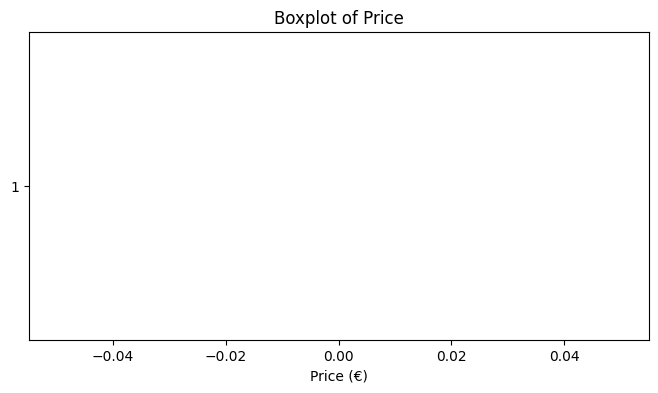

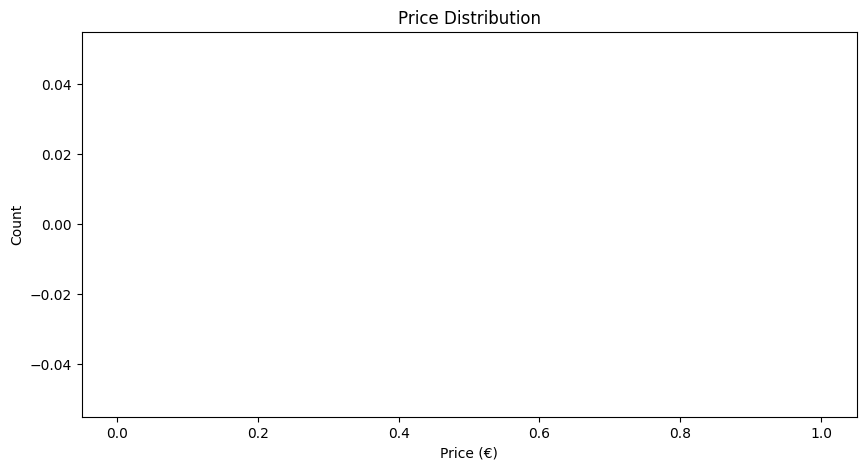

region
brussels   NaN
flanders   NaN
unknown    NaN
wallonia   NaN
Name: price, dtype: float64

In [16]:
import matplotlib.pyplot as plt
# Ensure price is numeric

df["price"] = pd.to_numeric(df["price"], errors="coerce")

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

print("Number of price outliers:", len(outliers))
outliers.head()

plt.figure(figsize=(8,4))
plt.boxplot(df["price"].dropna(), vert=False)
plt.title("Boxplot of Price")
plt.xlabel("Price (€)")
plt.show()


#Identify outliers visually using a histogram

plt.figure(figsize=(10,5))
plt.hist(df["price"].dropna(), bins=60)
plt.title("Price Distribution")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()

# separate for outliers



# Extract outliers into a separate DataFrame
price_outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

# Show number of outliers
#print("Number of price outliers:", len(price_outliers))

# Display the first few outliers
#price_outliers.head()



#correlation
df.corr(numeric_only=True)["price"].sort_values(ascending=False)   # correlation of Price

# add regions
def postal_to_region(code):
    if pd.isna(code):
        return "unknown"
    if 1000 <= code <= 1299:
        return "brussels"
    if (1300 <= code <= 1499) or (4000 <= code <= 7999):
        return "wallonia"
    if (1500 <= code <= 3990) or (8000 <= code <= 9992):
        return "flanders"
    return "unknown"
    
df["region"] = df["postal_code"].apply(postal_to_region)
price_outliers
df.groupby("region")["price"].median()
#df.isna().sum()



## data distributions


# global price distribution


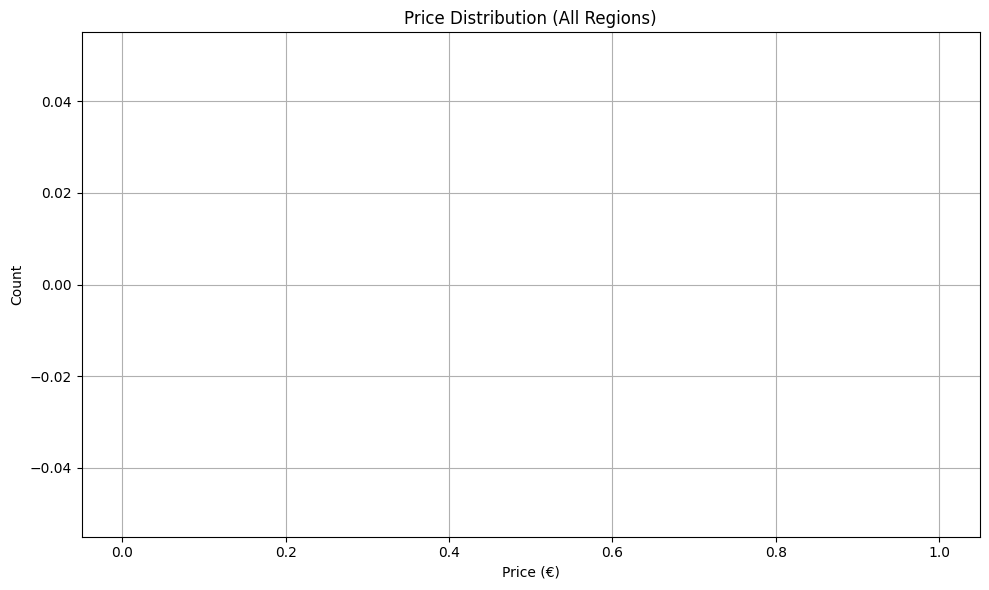

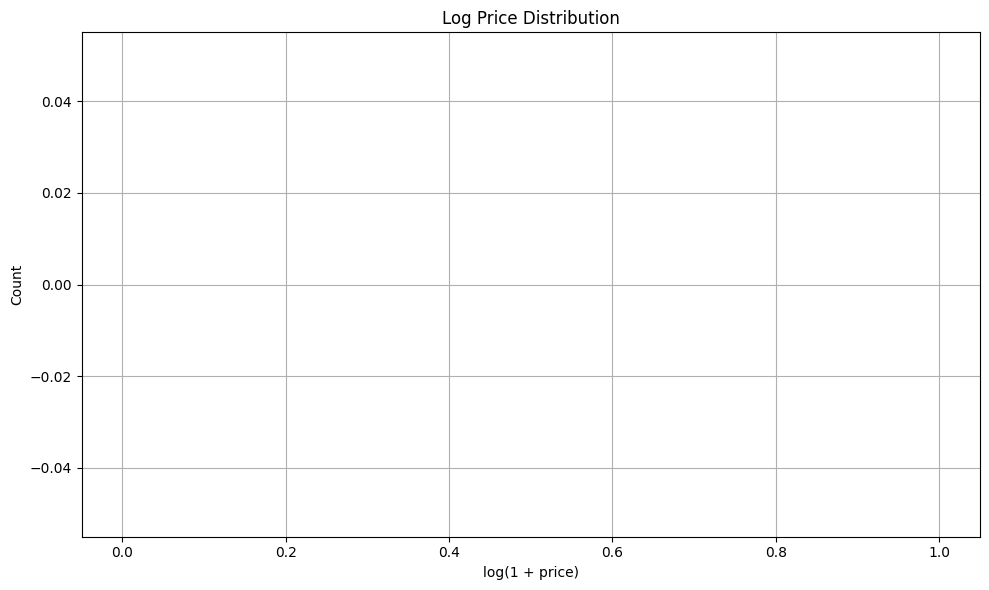

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df["price"].hist(bins=80)
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.title("Price Distribution (All Regions)")
plt.tight_layout()
plt.show()
# 
import numpy as np

plt.figure(figsize=(10,6))
np.log1p(df["price"]).hist(bins=80)
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.title("Log Price Distribution")
plt.tight_layout()
plt.show()


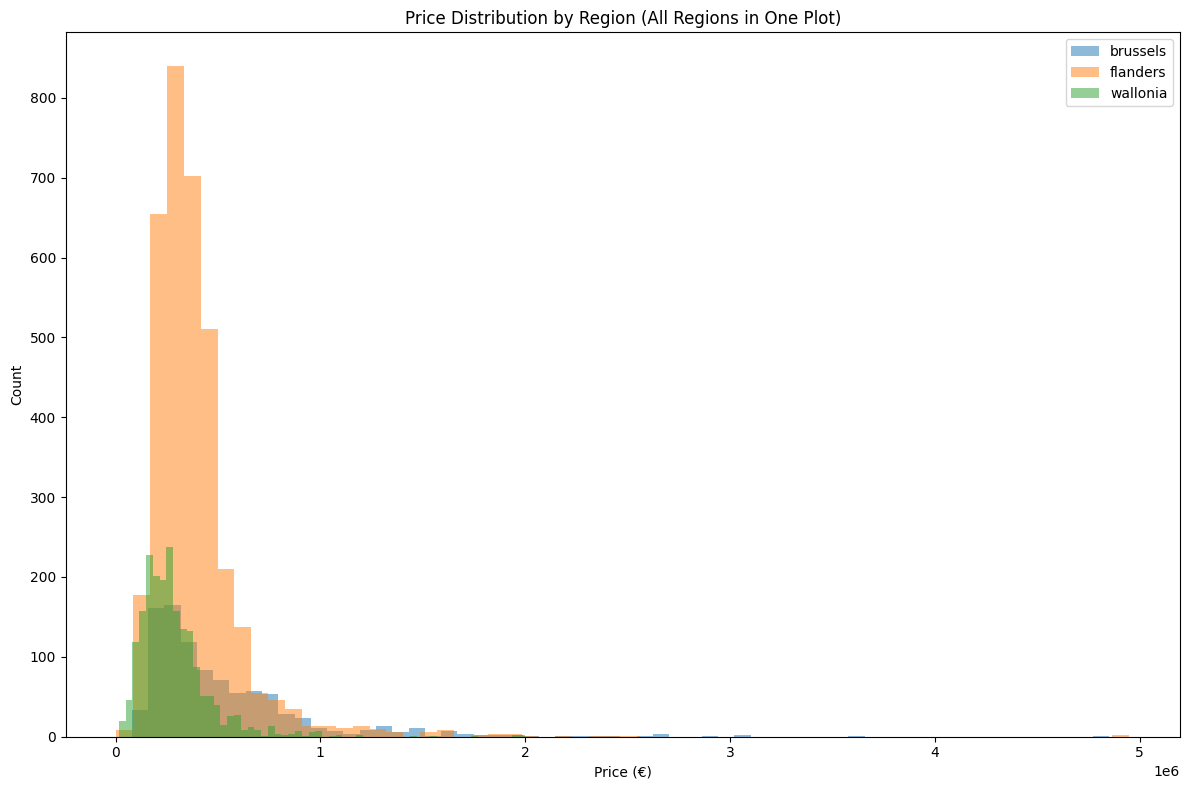

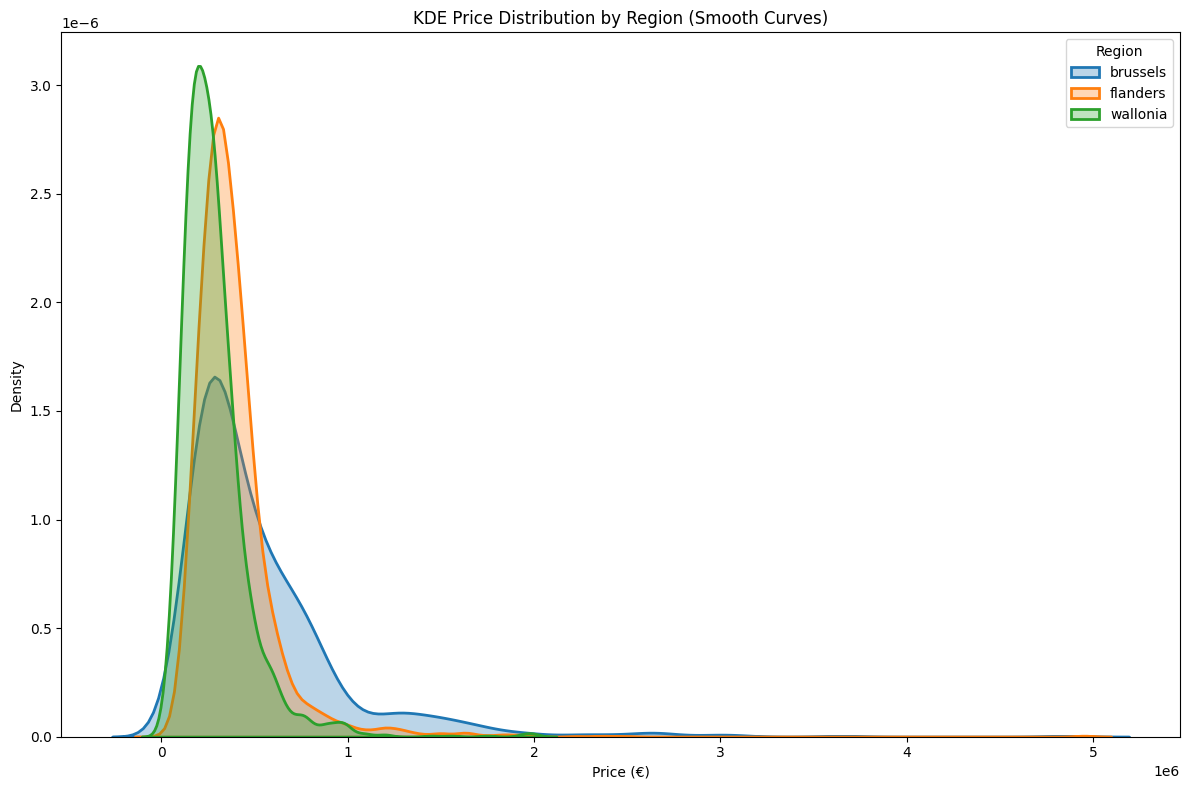

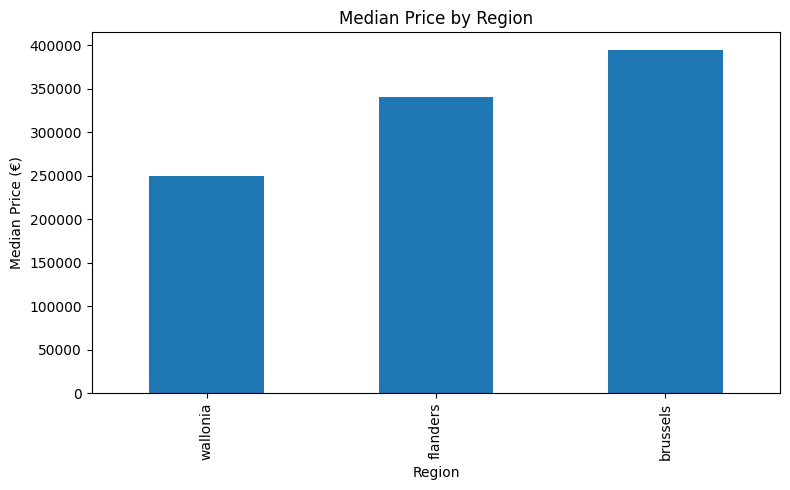

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df["price"].notna() & (df["price"] > 0)]


# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Keep only valid prices
df_valid = df[df["price"].notna() & (df["price"] > 0)]

# Get regions with valid price data
regions = df_valid["region"].dropna().unique()

plt.figure(figsize=(12,8))

# Loop and plot all price distributions in one histogram
for region in regions:
    subset = df_valid[df_valid["region"] == region]["price"]
    if subset.dropna().empty:
        continue
    plt.hist(subset, bins=60, alpha=0.5, label=region)

plt.title("Price Distribution by Region (All Regions in One Plot)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

#KDE


# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Keep only valid positive prices
df_valid = df[df["price"].notna() & (df["price"] > 0)]

plt.figure(figsize=(12,8))

# Plot KDE for each region
for region in df_valid["region"].dropna().unique():
    sns.kdeplot(
        df_valid[df_valid["region"] == region]["price"],
        label=region,
        fill=True,
        alpha=0.3,
        linewidth=2
    )

plt.title("KDE Price Distribution by Region (Smooth Curves)")
plt.xlabel("Price (€)")
plt.ylabel("Density")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

#by median
median_price = df.groupby("region")["price"].median().sort_values()

median_price.plot(kind="bar", figsize=(8,5))
plt.title("Median Price by Region")
plt.xlabel("Region")
plt.ylabel("Median Price (€)")
plt.tight_layout()
plt.show()




# <B> DELIVERABLES

## load the data and setting the libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")  # clean default style
df = pd.read_csv("data.csv")   #loading the dataset
df.head()
df = df.copy()




## 1) How many observations and features/columns do you have?

In [5]:
# Number of rows (observations) and columns (features)
n_rows, n_cols = df.shape
print(f"Observations: {n_rows}, Features: {n_cols}")

# Quick structural overview
df.info()


Observations: 10214, Features: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10214 entries, 0 to 10213
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   url               10214 non-null  object
 1   property_id       10214 non-null  object
 2   property_type     9218 non-null   object
 3   locality_name     9996 non-null   object
 4   postal_code       9996 non-null   object
 5   build_year        6224 non-null   object
 6   state             6960 non-null   object
 7   living_area       8712 non-null   object
 8   furnished         5537 non-null   object
 9   number_rooms      9069 non-null   object
 10  equipped_kitchen  2973 non-null   object
 11  terrace           8814 non-null   object
 12  facades           6909 non-null   object
 13  garden            10214 non-null  object
 14  garden_area       2285 non-null   object
 15  swimming_pool     10214 non-null  object
 16  price             9989 n

# 2) What is the proportion of missing values per column?

In [11]:
# missing count + percentage
missing_counts = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

missing_summary



#




,missing_count,missing_pct
garden_area,7929,77.63
equipped_kitchen,7241,70.89
furnished,4677,45.79
build_year,3990,39.06
facades,3305,32.36
state,3254,31.86
living_area,1502,14.71
terrace,1400,13.71
number_rooms,1145,11.21
property_type,996,9.75


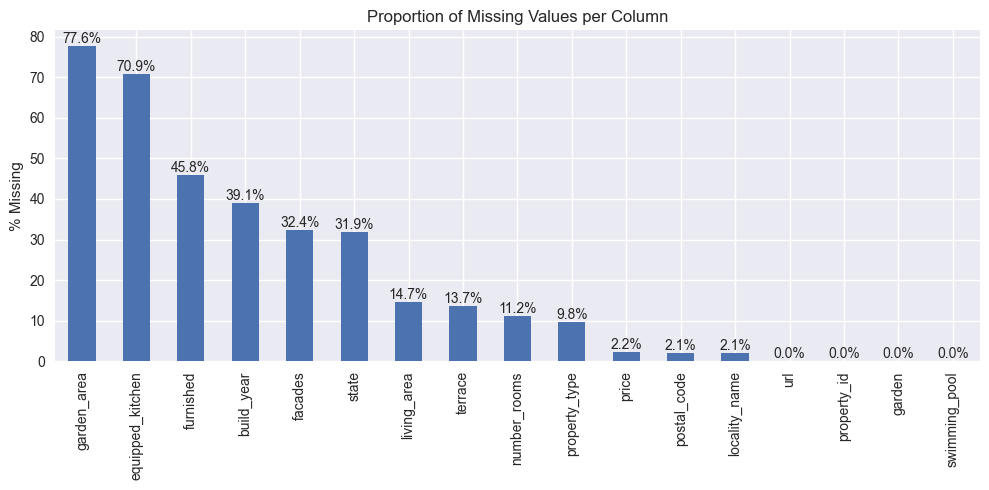

In [24]:
# Visualization missing values
ax = missing_summary["missing_pct"].plot(
    kind="bar",
    figsize=(10,5)
)

plt.ylabel("% Missing")
plt.title("Proportion of Missing Values per Column")
plt.tight_layout()

# Add percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}%",                               # format percentage
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()



#  ----------------data cleaning -------------

In [25]:
# Standardize and Clean Column Names :turn empty strings / “nan” / “none” into proper missing values (NaN)

df.columns = (
    df.columns.str.strip()                     # remove spaces at start/end
              .str.lower()                     # lowercase everything
              .str.replace(r"[^a-z0-9]+", "_", regex=True)  # non-alphanumeric -> "_"
              .str.strip("_")                  # remove "_" at start/end
)

text_cols = ["url", "property_id", "property_type", "locality_name", "state", "postal_code"]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].replace(["", "nan", "none", "NaN", "NULL"], np.nan)

# normalize numeric values

numeric_cols = ["living_area", "number_rooms", "build_year", "facades", "garden_area"]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")  # invalid -> NaN

  # Normalize Booleans (terrace, garden, pool)

bool_cols = ["terrace", "garden", "swimming_pool", "equipped_kitchen", "furnished"]
mapping = {"1": 1, "0": 0, "yes": 1, "no": 0, "true": 1, "false": 0}

for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().map(mapping)



# Remove Duplicates

print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


# Remove leading/trailing spaces in text columns

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()



#  Clean and convert the price column

import re

def parse_price(text):
    if pd.isna(text):
        return np.nan
    text = str(text).replace("\u202f", "")  # remove narrow non-breaking space
    nums = re.findall(r"\d+", text)        # extract all digit groups
    if not nums:
        return np.nan
    return float(max(int(n) for n in nums))  # take the largest number

df["price"] = df["price"].apply(parse_price)
df["price"].describe()




Duplicates before: 0
Duplicates after: 0


count    9.809000e+03
mean     4.106509e+05
std      3.150232e+05
min      3.713000e+03
25%      2.450000e+05
50%      3.450000e+05
75%      4.760000e+05
max      8.600002e+06
Name: price, dtype: float64

## Maping Postal Code into Province and Region

In [47]:
def postal_to_region(code):
    try:
        code_int = int(code)
    except (ValueError, TypeError):
        return "unknown"
    if 1000 <= code_int <= 1299:
        return "brussels"
    if (1300 <= code_int <= 1499) or (4000 <= code_int <= 7999):
        return "wallonia"
    if (1500 <= code_int <= 3990) or (8000 <= code_int <= 9992):
        return "flanders"
    return "unknown"

df["region"] = df["postal_code"].apply(postal_to_region)

# Province mapping (Belgium)
def postal_to_province(code):
    try:
        c = int(code)
    except:
        return "Unknown"
    if 1000 <= c <= 1299: return "Brussels"
    if 1300 <= c <= 1499: return "Walloon Brabant"
    if 1500 <= c <= 1999: return "Flemish Brabant"
    if 2000 <= c <= 2999: return "Antwerp"
    if 3000 <= c <= 3499: return "Flemish Brabant"
    if 3500 <= c <= 3999: return "Limburg"
    if 4000 <= c <= 4999: return "Liège"
    if 5000 <= c <= 5699: return "Namur"
    if 6000 <= c <= 6599: return "Hainaut"
    if 6600 <= c <= 6999: return "Luxembourg"
    if 7000 <= c <= 7999: return "Hainaut"
    if 8000 <= c <= 8999: return "West Flanders"
    if 9000 <= c <= 9999: return "East Flanders"
    return "Unknown"
df["province"] = df["postal_code"].apply(postal_to_province)









<b> Remarks: While certain variables, like build_year, facades, and state, have significant missingness, others, like pricing and property_id  have relatively little incomplete data.


# 3) Which variables would you delete and why?

#### URL , property_id(postal_code???) because they are identifiers,not explanatory variables. they are unique and useful for tracking but not for the price.  inaddition we want to remove furnished, equipped_kitchen and garden_area due to their relevance and mostly missing data

In [21]:
# Columns where almost all values are unique 
high_card = df.nunique().sort_values(ascending=False)
high_card

# Columns with (almost) constant values
low_var = df.nunique().sort_values()
low_var

garden                  0
terrace                 0
equipped_kitchen        0
swimming_pool           0
furnished               0
facades                 4
region                  4
state                  11
property_type          17
number_rooms           27
build_year            181
living_area           564
garden_area           791
postal_code           855
locality_name        1370
price                1530
url                 10213
property_id         10213
dtype: int64

 # 4) What variables are most subject to outliers?

In [31]:
# numeric summary + IQR outlier flag

# Select only numeric columns
num_cols = df.select_dtypes(include=["number"]).columns

outlier_counts = {}

for col in num_cols:
    series = df[col].dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower) | (series > upper)]
    outlier_counts[col] = len(outliers)

outlier_counts







{'build_year': 167,
 'living_area': 497,
 'furnished': 0,
 'number_rooms': 113,
 'equipped_kitchen': 0,
 'terrace': 0,
 'facades': 0,
 'garden': 0,
 'garden_area': 215,
 'swimming_pool': 0,
 'price': 612}

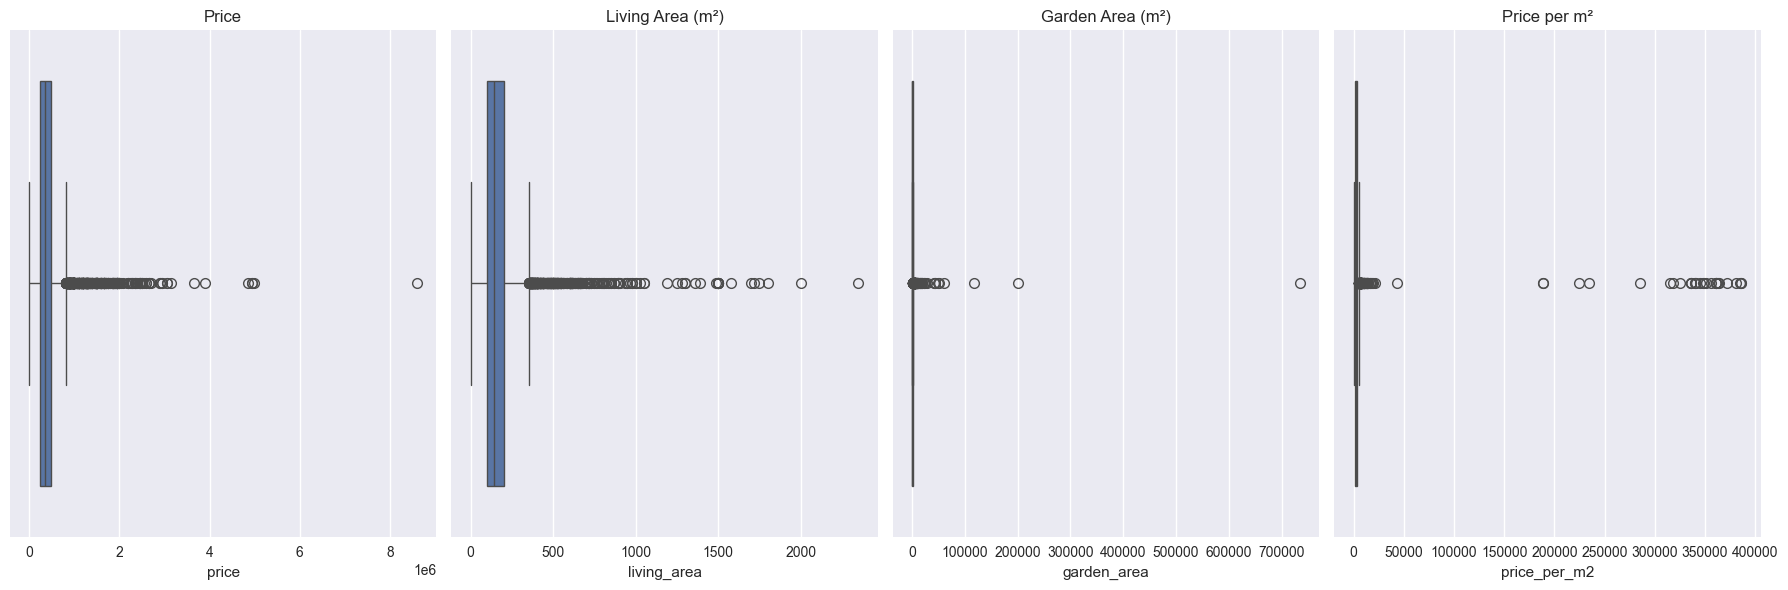

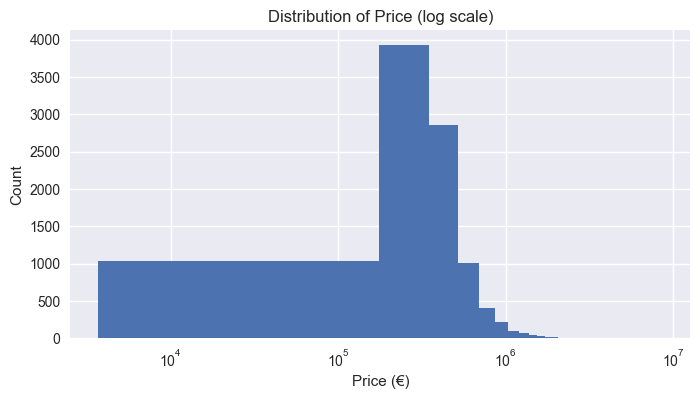

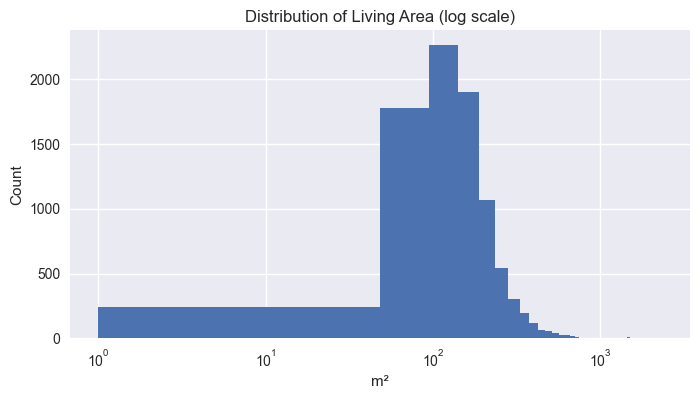

In [36]:
# boxplots

plt.figure(figsize=(18, 6))

# 1. Price
plt.subplot(1, 4, 1)
sns.boxplot(x=df["price"])
plt.title("Price")

# 2. Living Area
plt.subplot(1, 4, 2)
sns.boxplot(x=df["living_area"])
plt.title("Living Area (m²)")

# 3. Garden Area
plt.subplot(1, 4, 3)
sns.boxplot(x=df["garden_area"])
plt.title("Garden Area (m²)")

# 4. Price per m²
df["price_per_m2"] = df["price"] / df["living_area"]

plt.subplot(1, 4, 4)
sns.boxplot(x=df["price_per_m2"])
plt.title("Price per m²")

plt.tight_layout()
plt.show()

#Price (log scale) 


plt.figure(figsize=(8,4))
plt.hist(df["price"].dropna(), bins=50)
plt.xscale("log")
plt.title("Distribution of Price (log scale)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()

#Living area (log scale)

plt.figure(figsize=(8,4))
plt.hist(df["living_area"].dropna(), bins=50)
plt.xscale("log")
plt.title("Distribution of Living Area (log scale)")
plt.xlabel("m²")
plt.ylabel("Count")
plt.show()






<b>          Which variables have few or no outliers?

- Facades (0–4 typical range)

- Terrace, garden, swimming_pool, furnished, equipped_kitchen (binary variables)

- These do not produce outliers because their range is fixed.

# 5. How many qualitative and quantitative variables? Visuals and correlation measures?

In [37]:
quantitative = df.select_dtypes(include=[np.number]).columns.tolist()
qualitative = df.select_dtypes(include=["object"]).columns.tolist()

print("Quantitative:", quantitative)
print("Qualitative:", qualitative)
print(f"# Quantitative: {len(quantitative)}, # Qualitative: {len(qualitative)}")


Quantitative: ['build_year', 'living_area', 'furnished', 'number_rooms', 'equipped_kitchen', 'terrace', 'facades', 'garden', 'garden_area', 'swimming_pool', 'price', 'price_per_m2']
Qualitative: ['url', 'property_id', 'property_type', 'locality_name', 'postal_code', 'state', 'region']
# Quantitative: 12, # Qualitative: 7


# 6. What is the correlation between variables and price?

In [29]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr_with_price = df[num_cols].corr()["price"].sort_values(ascending=False)
corr_with_price


price               1.000000
living_area         0.601616
number_rooms        0.456787
facades             0.271459
garden_area         0.161749
build_year          0.015536
furnished                NaN
equipped_kitchen         NaN
terrace                  NaN
garden                   NaN
swimming_pool            NaN
Name: price, dtype: float64

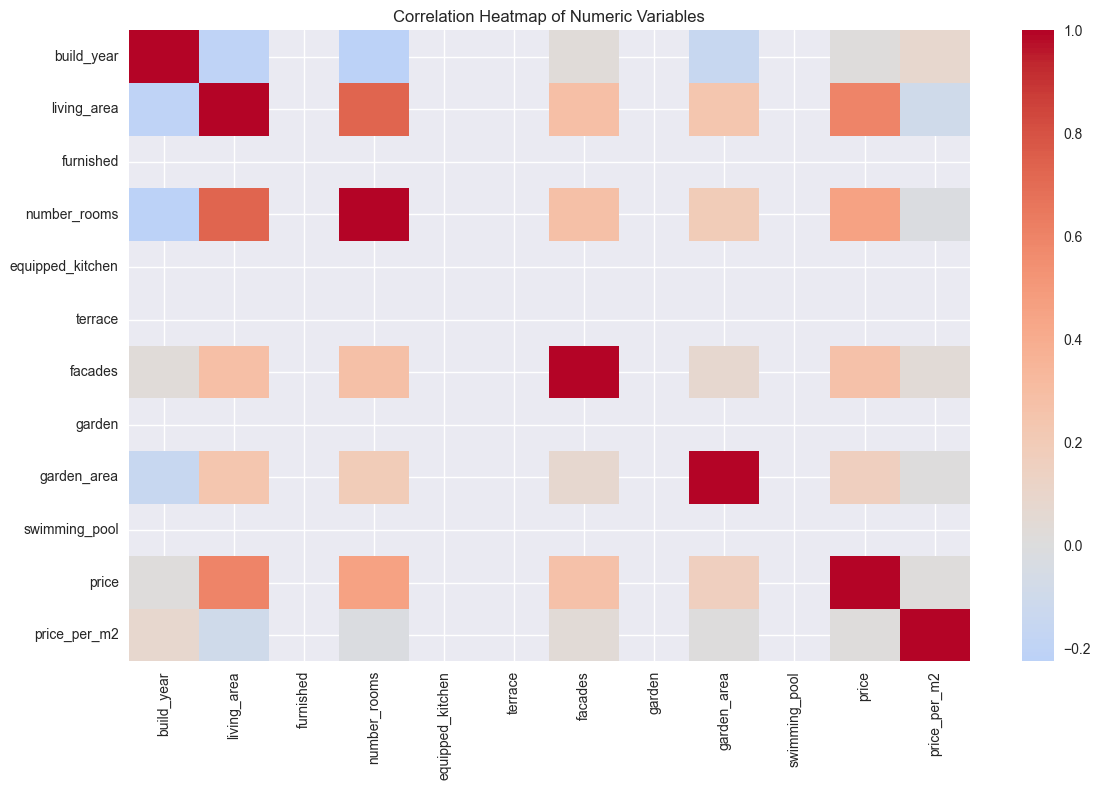

In [38]:
num_cols = df.select_dtypes(include="number").columns
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

<b> Larger properties are typically more expensive, as seen by the significant correlation between price and living area and number of rooms. Geographical factors like postal code and location can have a big impact on prices. Because they are less common and frequently found in particular house types and upscale properties, things like gardens, terraces, and pools have a favorable but more limited impact. 


<b> We find that the number of rooms and living area have a high correlation, establishing a size-related group of variables that together represent the property's physical volume. Price per square meter and location factors also frequently correlate, particularly within a given region. Another minor correlation group that is typical of higher-end residences is formed by the likelihood of amenities like a garden, terrace, and swimming pool to co-occur.

### catagorical variables

In [152]:
df.groupby("region")["price"].median()
df.groupby("property_type")["price"].median()
df.groupby("state")["price"].median()


state
Excellent             3.950000e+09
Fully renovated       3.100000e+09
New                   3.850000e+09
Normal                2.990000e+09
To be renovated       2.455000e+09
To demolish           2.590000e+09
To renovate           2.495000e+09
To restore            2.670000e+09
Under construction    2.200000e+09
nan                   3.167000e+09
Name: price, dtype: float64

# Anaysis by municipality

In [43]:
# === Municipality price ranking ===
# Create region variable
def postal_to_region(code):
    try:
        c = int(code)
    except:
        return "unknown"
    if 1000 <= c <= 1299:
        return "brussels"
    if (1300 <= c <= 1499) or (4000 <= c <= 7999):
        return "wallonia"
    if (1500 <= c <= 3990) or (8000 <= c <= 9992):
        return "flanders"
    return "unknown"

df["region"] = df["postal_code"].apply(postal_to_region)

# Group by municipality

muni_stats = df.groupby(["locality_name","region"], dropna=True).agg(
    avg_price=("price","mean"),
    median_price=("price","median"),
    avg_m2=("price_per_m2","mean"),
    count=("price","count")
).reset_index()

# Filter only municipalities with enough listings (≥ 20)
muni_stats = muni_stats[muni_stats["count"] >= 20]

# Top expensive per m²
top_m2 = muni_stats.sort_values("avg_m2", ascending=False).head(10)

# Cheap per m²
low_m2 = muni_stats.sort_values("avg_m2", ascending=True).head(10)

top_m2, low_m2

(               locality_name    region     avg_price  median_price  \
 931                   Opwijk  flanders  4.554301e+05      415000.0   
 601                 Jodoigne  wallonia  3.935547e+05      357025.0   
 629                   Knokke  flanders  1.046450e+06      935000.0   
 1203                  Tubize  wallonia  3.092108e+05      285000.0   
 1084                 Seraing  wallonia  2.237667e+05      239000.0   
 630             Knokke-Heist  flanders  8.548364e+05      732000.0   
 326                   Elsene  brussels  7.741981e+05      665000.0   
 883               Nieuwpoort  flanders  3.965381e+05      367170.0   
 1110  Sint-Lambrechts-Woluwe  brussels  7.106354e+05      565000.0   
 698                   Leuven  flanders  5.666061e+05      489000.0   
 
             avg_m2  count  
 931   20786.927338     23  
 601   16112.486950     26  
 629   11381.879729     20  
 1203  10564.926023     53  
 1084   8897.733565     30  
 630    8328.246226     22  
 326    5038.7

## by provinces and region

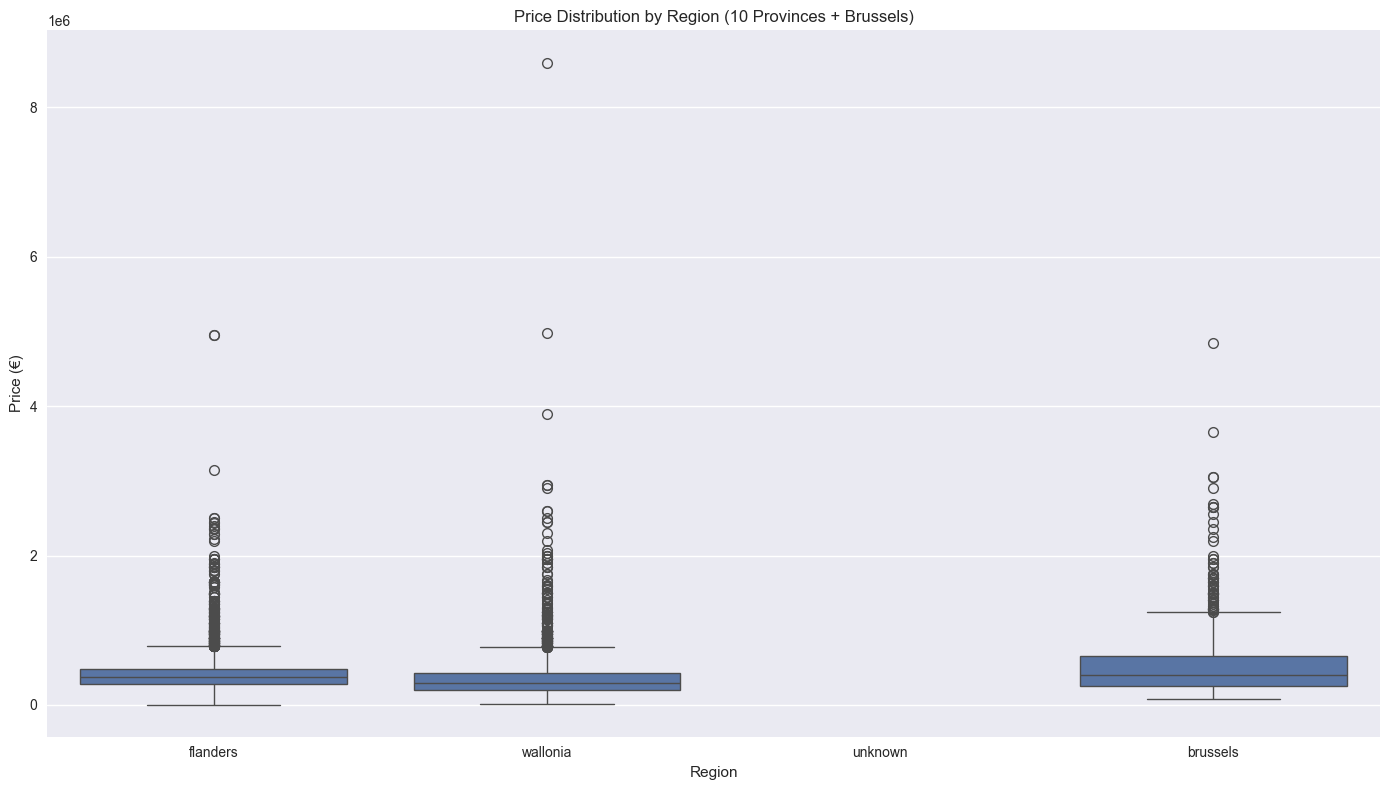

In [44]:
# PRICE DISTRIBUTION FOR 10 PROVINCES + BRUSSELS
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="region", y="price")
plt.title("Price Distribution by Region (10 Provinces + Brussels)")
plt.xlabel("Region")
plt.ylabel("Price (€)")
plt.tight_layout()
plt.show()

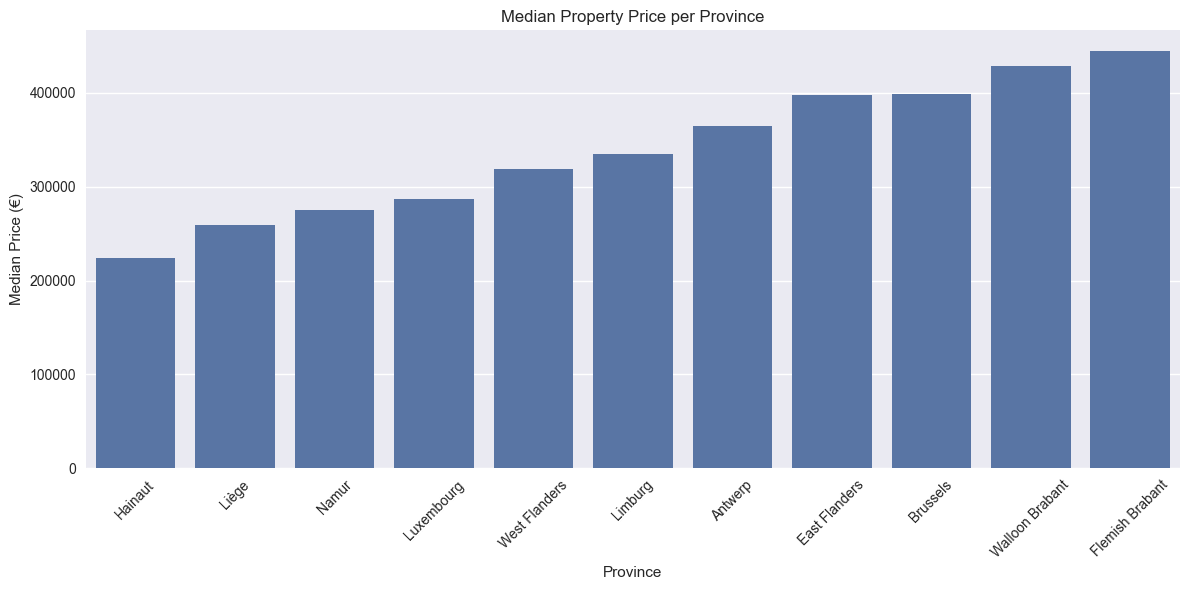

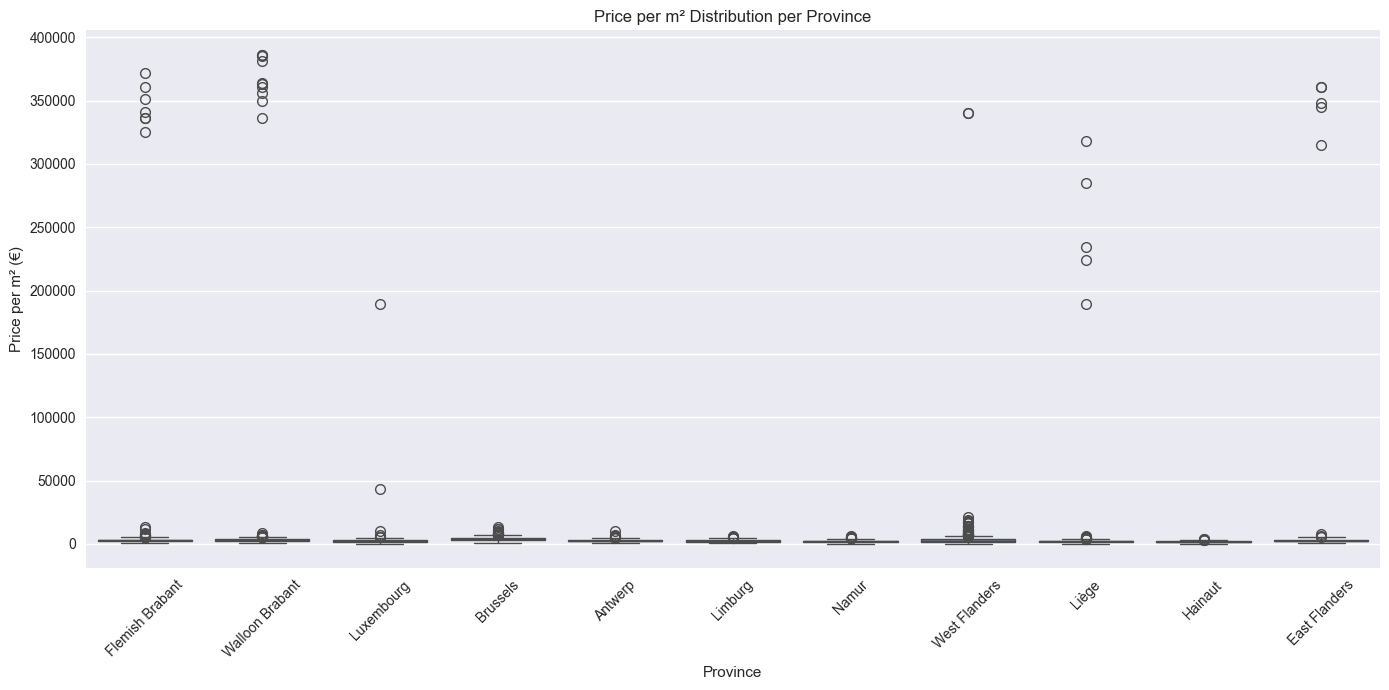

In [48]:
# Filter valid province
df_valid = df[df["province"] != "Unknown"].copy()

# -----------------------------
# D: Median price per province
# -----------------------------
median_prices = df_valid.groupby("province")["price"].median().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=median_prices.index, y=median_prices.values)
plt.title("Median Property Price per Province")
plt.ylabel("Median Price (€)")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# E: Price per m² distribution per province (boxplot)
# -----------------------------
plt.figure(figsize=(14,7))
sns.boxplot(data=df_valid, x="province", y="price_per_m2")
plt.title("Price per m² Distribution per Province")
plt.ylabel("Price per m² (€)")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()